In [3]:
from parameter_initialization_deep_rl.common.analyze import (
    percentile,
    group_1d,
    group2d,
    plot_bar_1d,
    plot_bar_1d_v2,
    performance_quantile,
    performance_table
)
import pandas as pd
from parameter_initialization_deep_rl.common.helpers import plot_performance
import numpy as np

In [4]:
df = pd.read_csv("../global_logging.csv")
print(df.shape[0])

528


Overall Performance Table

In [5]:
performance_table(df)

max_perf     quantile
algo env                                       
A2C  BipedalWalker-v3   187.497118   156.587802
     HalfCheetah-v3    1649.564081  1055.454693
     LunarLander-v2      -3.880294   -79.938371
     MountainCar-v0    -128.946316  -131.456526
DQN  LunarLander-v2     135.185214   118.507398
     MountainCar-v0    -150.978000  -161.414900
PPO  BipedalWalker-v3   218.835760   186.511663
     HalfCheetah-v3    4877.644013  4730.248624
     LunarLander-v2     201.402524   190.758126
     MountainCar-v0    -117.522000  -123.293200
SAC  BipedalWalker-v3   191.948887   185.322230
     HalfCheetah-v3    8381.220755  7979.875161
TD3  BipedalWalker-v3   233.477470   210.312384
     HalfCheetah-v3    8192.291341  7938.684100

DQN

In [6]:
algo = "SAC"
envs = list(set(df[df["algo"] == algo]["env"].values.tolist()))
attr = ["weight_init", "bias_init", "activation_fn","policy_net_scaling", "performance", "trials", "peak_perf"][0]
weight_init = ["lecun_normal", "xavier_normal", "kaiming_normal", "orthogonal", "sparse"]
save_path = f"./plots/{algo}"

In [7]:
df = df[df["weight_init"].isin(weight_init)]

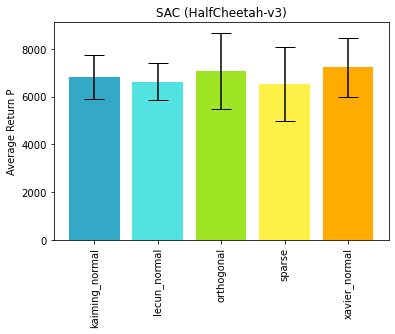

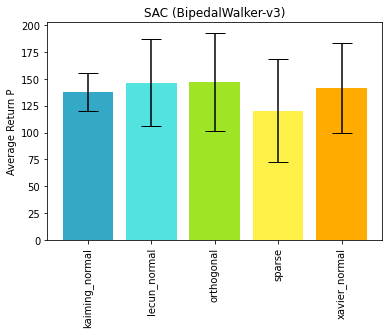

In [8]:
for env in envs:
    grouped_df = group_1d(df=df,algo=algo,env=env,attr=attr)
    plot_bar_1d_v2(labels=grouped_df[attr], avg=grouped_df["avg_perf"], std=grouped_df["std_perf"], 
        title=f"{algo} ({env})", save_path=f"{save_path}/{env}_{attr}")


Normalized performance disttribution of weight initialization across environments

/var/folders/tm/4lvd3bxs183gckwrqdkhygpr0000gn/T/ipykernel_8892/81639145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["norm_perf"] = ((df2["performance"] - min_perf) / (max_perf - min_perf)) * 100
/var/folders/tm/4lvd3bxs183gckwrqdkhygpr0000gn/T/ipykernel_8892/81639145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["norm_perf"] = ((df2["performance"] - min_perf) / (max_perf - min_perf)) * 100


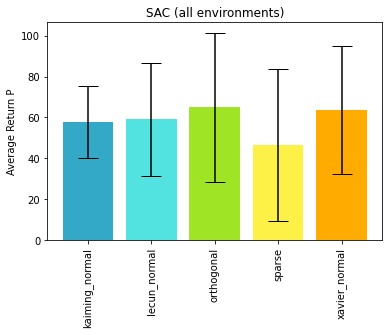

In [9]:
frames = []
for env in envs:
    df2 = df[(df["algo"] == algo) & (df["env"] == env)]
    min_perf = df2["performance"].min()
    max_perf = df2["performance"].max()
    df2["norm_perf"] = ((df2["performance"] - min_perf) / (max_perf - min_perf)) * 100
    frames.append(df2)
df_norm = pd.concat(frames)
df_norm_grouped = group_1d(df=df_norm, algo=algo, attr=attr, perf_attr="norm_perf")
plot_bar_1d_v2(labels=df_norm_grouped[attr], avg=df_norm_grouped["avg_perf"], std=df_norm_grouped["std_perf"], 
    title=f"{algo} (all environments)", save_path=f"{save_path}/All_envs_{attr}")

/var/folders/tm/4lvd3bxs183gckwrqdkhygpr0000gn/T/ipykernel_8892/639847653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["norm_perf"] = ((df2["performance"] - min_perf) / (max_perf - min_perf)) * 100
/var/folders/tm/4lvd3bxs183gckwrqdkhygpr0000gn/T/ipykernel_8892/639847653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["norm_perf"] = ((df2["performance"] - min_perf) / (max_perf - min_perf)) * 100


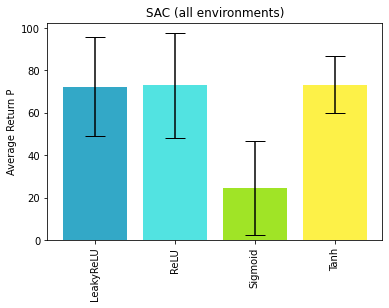

In [10]:
frames = []
for env in envs:
    df2 = df[(df["algo"] == algo) & (df["env"] == env)]
    min_perf = df2["performance"].min()
    max_perf = df2["performance"].max()
    df2["norm_perf"] = ((df2["performance"] - min_perf) / (max_perf - min_perf)) * 100
    frames.append(df2)
df_norm = pd.concat(frames)
df_norm_grouped = group_1d(df=df_norm, algo=algo, attr="activation_fn", perf_attr="norm_perf")
plot_bar_1d_v2(labels=df_norm_grouped["activation_fn"], avg=df_norm_grouped["avg_perf"], std=df_norm_grouped["std_perf"], 
    title=f"{algo} (all environments)", save_path=f"{save_path}/All_envs_af")

Performance distribution of weight init in condition to activation function

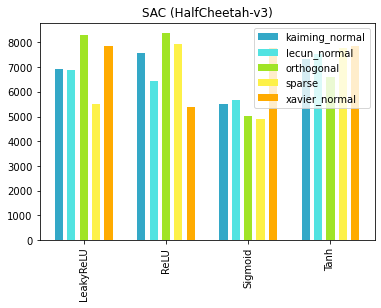

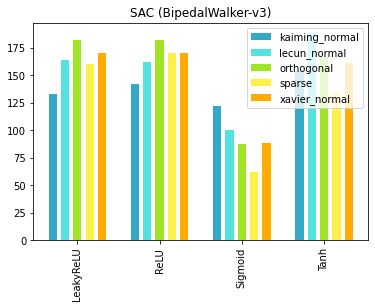

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import cycle, islice

activation_fns = ["LeakyReLU", "ReLU", "Sigmoid", "Tanh"]

colors = list(islice(cycle(['#33a8c7ff', '#52e3e1ff', '#a0e426ff', '#fdf148ff',
                  '#ffab00ff', '#f77976ff', '#f050aeff', '#d883ffff', '#9336fdff']), None, len(weight_init)))
x = np.arange(len(activation_fns))
width = 0.1

for env in envs:
    grouped_2d = group2d(df, algo=algo, attr1="activation_fn", attr2="weight_init", env=env)
    plt.figure()
    plt.bar(x-0.3, grouped_2d[grouped_2d["weight_init"] == "kaiming_normal"]["avg_perf"], width, color=colors[0], label="kaiming_normal")
    plt.bar(x-0.15, grouped_2d[grouped_2d["weight_init"] == "lecun_normal"]["avg_perf"], width, color=colors[1], label="lecun_normal")
    plt.bar(x, grouped_2d[grouped_2d["weight_init"] == "orthogonal"]["avg_perf"], width, color=colors[2], label="orthogonal")
    plt.bar(x+0.15, grouped_2d[grouped_2d["weight_init"] == "sparse"]["avg_perf"], width, color=colors[3], label="sparse")
    plt.bar(x+0.3, grouped_2d[grouped_2d["weight_init"] == "xavier_normal"]["avg_perf"], width, color=colors[4], label="xavier_normal")
    plt.xticks(x, activation_fns, rotation=90)
    plt.title(f"{algo} ({env})")
    plt.savefig(f"{save_path}/{env}_weight_af_combination", dpi=200, bbox_inches="tight")
    plt.legend()
    plt.show()

Performance distribution of weight init in condition to activation function across all environments

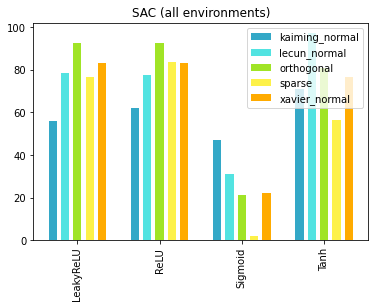

In [12]:
grouped_2d = group2d(df_norm, algo=algo, attr1="activation_fn", attr2="weight_init", perf_attr="norm_perf", env=env)
plt.figure()
plt.bar(x-0.3, grouped_2d[grouped_2d["weight_init"] == "kaiming_normal"]["avg_perf"], width, color=colors[0], label="kaiming_normal")
plt.bar(x-0.15, grouped_2d[grouped_2d["weight_init"] == "lecun_normal"]["avg_perf"], width, color=colors[1], label="lecun_normal")
plt.bar(x, grouped_2d[grouped_2d["weight_init"] == "orthogonal"]["avg_perf"], width, color=colors[2], label="orthogonal")
plt.bar(x+0.15, grouped_2d[grouped_2d["weight_init"] == "sparse"]["avg_perf"], width, color=colors[3], label="sparse")
plt.bar(x+0.3, grouped_2d[grouped_2d["weight_init"] == "xavier_normal"]["avg_perf"], width, color=colors[4], label="xavier_normal")
plt.xticks(x, activation_fns, rotation=90)
plt.title(f"{algo} (all environments)")
plt.legend()
plt.savefig(f"{save_path}/All_envs_weight_af_combination", dpi=200, bbox_inches="tight")
plt.show()

In [13]:
timestep_dict = {
    "DQN_LunarLander-v2": dict(
        stepsize = 5000,
        train_timesteps = 100000,
    ),
    "DQN_MountainCar-v0": dict(
        stepsize = 7500,
        train_timesteps = 1.5e5,
    ),
    "PPO_LunarLander-v2": dict(
        stepsize = 25000,
        train_timesteps = 5e5,
    ),
    "PPO_MountainCar-v0": dict(
        stepsize = 25000,
        train_timesteps = 5e5,
    ),
    "PPO_BipedalWalker-v3": dict(
        stepsize = 125000,
        train_timesteps = 2.5e6,
    ),
    "PPO_HalfCheetah-v3": dict(
        stepsize = 50000,
        train_timesteps = 1e6,
    ),
    "A2C_LunarLander-v2": dict(
        stepsize = 25000,
        train_timesteps = 5e5,
    ),
    "A2C_MountainCar-v0": dict(
        stepsize = 25008,
        train_timesteps = 475152,
    ),
    "A2C_BipedalWalker-v3": dict(
        stepsize = 125008,
        train_timesteps = 2375152,
    ),
    "A2C_HalfCheetah-v3": dict(
        stepsize = 50000,
        train_timesteps = 1e6,
    ),
    "TD3_BipedalWalker-v3": dict(
        stepsize = 25000,
        train_timesteps = 5e5,
    ),
    "TD3_HalfCheetah-v3": dict(
        stepsize = 25000,
        train_timesteps = 5e5,
    ),
    "SAC_BipedalWalker-v3": dict(
        stepsize = 2e4,
        train_timesteps = 2e5,
    ),
    "SAC_HalfCheetah-v3": dict(
        stepsize = 25000,
        train_timesteps = 5e5,
    ),
}

In [14]:
def prepare_trials(df):
    trials = df["trials"].to_list()
    trials = [trial.split(" ") for trial in trials]
    for trial in trials:
        try:
            trial.remove("")
        except ValueError:
            pass
    trials = np.array(trials).astype(np.float64)
    return trials

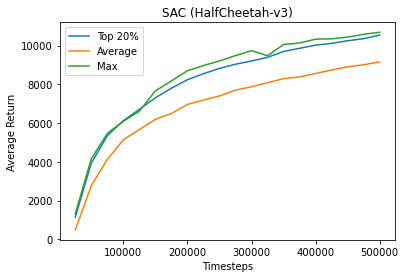

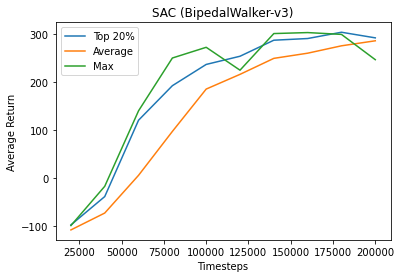

In [15]:
from matplotlib import pyplot as plt

for env in envs:
    # Average trials
    avg_trials = prepare_trials(df[(df["algo"] == algo) & (df["env"] == env)])
    # Top 20%
    top_trials = prepare_trials(performance_quantile(df,algo=algo, env=env, q=0.2))
    # Average performance
    avg_perf = np.average(avg_trials, axis=0)
    # Top 20% performance
    top_perf = np.average(top_trials, axis=0)
    # Max performance
    max_perf = prepare_trials(df[(df["algo"] == algo) & (df["env"] == env)].nlargest(1,"performance"))[0]
    stepsize = timestep_dict[f"{algo}_{env}"]["stepsize"]
    train_timesteps = timestep_dict[f"{algo}_{env}"]["train_timesteps"]
    x = np.arange(stepsize, train_timesteps+stepsize, stepsize)
    # Show plots
    plt.figure()
    plt.plot(x, top_perf, label="Top 20%")
    plt.plot(x, avg_perf, label="Average")
    plt.plot(x, max_perf, label="Max")
    plt.xlabel("Timesteps")
    plt.ylabel("Average Return")
    plt.title(f"{algo} ({env})")
    plt.legend()
    plt.show()

Average Performance based on weight init

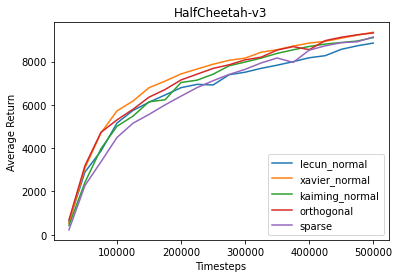

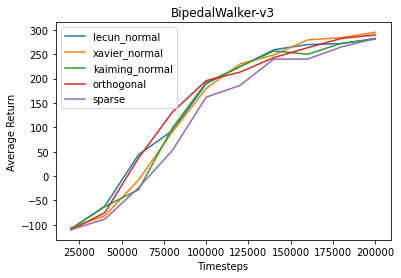

In [16]:
for env in envs:
    plt.figure()
    stepsize = timestep_dict[f"{algo}_{env}"]["stepsize"]
    train_timesteps = timestep_dict[f"{algo}_{env}"]["train_timesteps"]
    x=np.arange(stepsize, train_timesteps+stepsize, stepsize)
    for init in weight_init:
        trials = prepare_trials(df[(df["algo"] == algo) & (df["env"] == env) & (df["weight_init"] == init)])
        if trials.size != 0:
            y=np.average(trials, axis=0)
            plt.plot(x, y, label=init)
    plt.xlabel("Timesteps")
    plt.ylabel("Average Return")
    plt.legend()
    plt.title(env)
    plt.savefig(f"{save_path}/{env}_weight_init_learning_curve", dpi=200)
    plt.show()

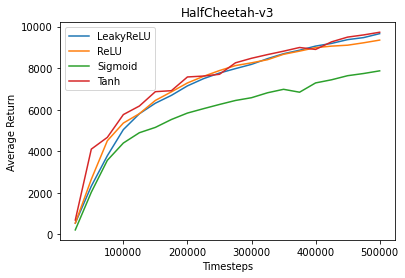

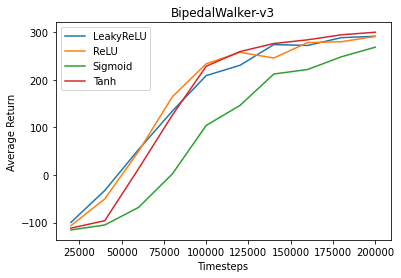

In [17]:
for env in envs:
    plt.figure()
    stepsize = timestep_dict[f"{algo}_{env}"]["stepsize"]
    train_timesteps = timestep_dict[f"{algo}_{env}"]["train_timesteps"]
    x=np.arange(stepsize, train_timesteps+stepsize, stepsize)
    for afn in activation_fns:
        trials = prepare_trials(df[(df["algo"] == algo) & (df["env"] == env) & (df["activation_fn"] == afn)])
        if trials.size != 0:
            y=np.average(trials, axis=0)
            plt.plot(x, y, label=afn)
    plt.xlabel("Timesteps")
    plt.ylabel("Average Return")
    plt.legend()
    plt.title(env)
    plt.savefig(f"{save_path}/{env}_af_learning_curve", dpi=200)
    plt.show()